### R notebook to read data and attempt forecasting model

### Date: 21/01/2016 - last revision: 16/02/2016

In [1]:
getwd()

[1] "C:/Users/barro/Dropbox/a2i2_mb/PROGRAMAS"

#### Need to change the lines below according to the location of the Dropbox

In [2]:
file_name=file.path(("C:/Users/barro/Dropbox/a2i2_flashfarma/Estudos"), "Historico_Categorias_e_lojas_desde_20120101.csv") 

In [3]:
file_name

[1] "C:/Users/barro/Dropbox/a2i2_flashfarma/Estudos/Historico_Categorias_e_lojas_desde_20120101.csv"

#### Define dataframe to hold the data

In [4]:
df = read.table(file=file_name,header = TRUE, sep = ",", dec = ".")

In [5]:
# Dimensions of the dataframe
dim(df)

[1] 1484   66

#### To verify if reading was done correctly - pay attention to dates and whatever (if any) was read as factor

In [6]:
str(df)   

'data.frame':	1484 obs. of  66 variables:
 $ dataVenda         : Factor w/ 1484 levels "2012-01-01","2012-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Dia.da.Semana     : int  1 2 3 4 5 6 7 1 2 3 ...
 $ Feriado_Nacional  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Carnaval          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pascoa            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiradentes        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dia_Trabalho      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Corpus_Christi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Independencia     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NSAparecida       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Finados           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Republica         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Natal             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Reveillon         : int  1 0 0 0 0 0 0 0 0 0 ...
 $ valorCategoria1   : num  108 149 152 197 111 ...
 $ valorCategoria2   : num  23.1 87 128.9 209.8 225.7 ...
 $ valorCategoria3   : num  45.3 576.7 576.9 664 626.5 ...
 $ valorCateg

### Create column with dates

In [7]:
df$Data = as.Date(df$dataVenda, format = "%d-%m-%y")

In [8]:
head(df, n = 3)

,dataVenda,Dia.da.Semana,Feriado_Nacional,Carnaval,Pascoa,Tiradentes,Dia_Trabalho,Corpus_Christi,Independencia,NSAparecida,ellip.h,qtdeCategoria22,qtde_Loja01,qtde_Loja02,qtde_Loja03,Entrada_op_Loja_03,valor_Loja01,valor_Loja02,valor_Loja03,Faturamento_total,Data
1,2012-01-01,1,1,0,0,0,0,0,0,0,<8b>,0,251,0,0,0,2154.84,0,0,2154.84,NA
2,2012-01-02,2,0,0,0,0,0,0,0,0,<8b>,19,975,800,0,0,8788.77,6707.82,0,15496.59,NA
3,2012-01-03,3,0,0,0,0,0,0,0,0,<8b>,15,1054,615,0,0,9209.07,5372.7,0,14581.77,NA


In [9]:
tail(df, n=4)

,dataVenda,Dia.da.Semana,Feriado_Nacional,Carnaval,Pascoa,Tiradentes,Dia_Trabalho,Corpus_Christi,Independencia,NSAparecida,ellip.h,qtdeCategoria22,qtde_Loja01,qtde_Loja02,qtde_Loja03,Entrada_op_Loja_03,valor_Loja01,valor_Loja02,valor_Loja03,Faturamento_total,Data
1481,2016-01-20,4,0,0,0,0,0,0,0,0,<8b>,12,536,394,235,1,5605.84,4093.54,2807.4,12506.78,NA
1482,2016-01-21,5,0,0,0,0,0,0,0,0,<8b>,16,531,430,395,1,6122.49,4408.54,4686.73,15217.76,NA
1483,2016-01-22,6,0,0,0,0,0,0,0,0,<8b>,20,554,397,413,1,6398.82,4504.21,4244.33,15147.36,NA
1484,2016-01-23,7,0,0,0,0,0,0,0,0,<8b>,25,605,443,402,1,5365.61,4954.79,3661.45,13981.85,NA


In [10]:
# Attaches the data frame, so we don´t need to refer to its name and the column name all the time
attach(df)

### Creating lagged values of the Total Daily Revenue

In [11]:
df$Data[1:10]

 [1] NA NA NA NA NA NA NA NA NA NA

In [12]:
str(df$Data)

 Date[1:1484], format: NA NA NA NA NA NA NA NA NA NA NA NA NA NA ...


### Need to call xts package, which needs to be previously installed

In [13]:
library(xts)

Warning message:
: package 'xts' was built under R version 3.2.3Loading required package: zoo
Warning message:
: package 'zoo' was built under R version 3.2.3
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



### Create Column with Total revenue

In [14]:
df$Receita_Liq_Total =df$valor_Loja01 + df$valor_Loja02 + df$valor_Loja03

In [15]:
str(df)

'data.frame':	1484 obs. of  68 variables:
 $ dataVenda         : Factor w/ 1484 levels "2012-01-01","2012-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Dia.da.Semana     : int  1 2 3 4 5 6 7 1 2 3 ...
 $ Feriado_Nacional  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Carnaval          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pascoa            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiradentes        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dia_Trabalho      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Corpus_Christi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Independencia     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NSAparecida       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Finados           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Republica         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Natal             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Reveillon         : int  1 0 0 0 0 0 0 0 0 0 ...
 $ valorCategoria1   : num  108 149 152 197 111 ...
 $ valorCategoria2   : num  23.1 87 128.9 209.8 225.7 ...
 $ valorCategoria3   : num  45.3 576.7 576.9 664 626.5 ...
 $ valorCateg

### Converting revenue columns to time series

In [16]:
df$Receita_Liq_Total = as.xts(df$Receita_Liq_Total, as.Date(df$Data, format = "%d-%m-%y"))
df$valor_Loja01 = as.xts(df$valor_Loja01, as.Date(df$Data, format = "%d-%m-%y"))
df$valor_Loja02 = as.xts(df$valor_Loja02, as.Date(df$Data, format = "%d-%m-%y"))
df$valor_Loja03 = as.xts(df$valor_Loja03, as.Date(df$Data, format = "%d-%m-%y"))

In [17]:
df$Receita_Liq_Total[1:5]

         [,1]
<NA>  2154.84
<NA> 15496.59
<NA> 14581.77
<NA> 15275.80
<NA> 15765.62

In [18]:
str(valor_Loja01)

 num [1:1484] 2155 8789 9209 9380 9403 ...


In [19]:
str(df$valor_Loja01)

An 'xts' object on NA/NA containing:
  Data: num [1:1484, 1] 2155 8789 9209 9380 9403 ...
  Indexed by objects of class: [Date] TZ: UTC
  Original class: 'double'  
  xts Attributes:  
 NULL


### Create lagged variables

In [20]:
df$l01_Receita_Liq_Total=lag(df$Receita_Liq_Total,1)

In [21]:
df$l01_Receita_Liq_Total[1:8] 

         [,1]
<NA>       NA
<NA>  2154.84
<NA> 15496.59
<NA> 14581.77
<NA> 15275.80
<NA> 15765.62
<NA> 16031.13
<NA> 14253.16

In [22]:
df$l02_Receita_Liq_Total=lag(df$Receita_Liq_Total,2)

In [23]:
df$l02_Receita_Liq_Total[1:8] 

         [,1]
<NA>       NA
<NA>       NA
<NA>  2154.84
<NA> 15496.59
<NA> 14581.77
<NA> 15275.80
<NA> 15765.62
<NA> 16031.13

In [24]:
df$l03_Receita_Liq_Total=lag(df$Receita_Liq_Total,3)

In [25]:
df$l04_Receita_Liq_Total=lag(df$Receita_Liq_Total,4)

In [26]:
df$l05_Receita_Liq_Total=lag(df$Receita_Liq_Total,5)

In [27]:
df$l06_Receita_Liq_Total=lag(df$Receita_Liq_Total,6)

In [28]:
df$l07_Receita_Liq_Total=lag(df$Receita_Liq_Total,7)

In [29]:
df$l08_Receita_Liq_Total=lag(df$Receita_Liq_Total,8)

In [30]:
df$l09_Receita_Liq_Total=lag(df$Receita_Liq_Total,9)

In [31]:
df$l10_Receita_Liq_Total=lag(df$Receita_Liq_Total,10)

In [32]:
df$l11_Receita_Liq_Total=lag(df$Receita_Liq_Total,11)

In [33]:
df$l12_Receita_Liq_Total=lag(df$Receita_Liq_Total,12)

In [34]:
df$l13_Receita_Liq_Total=lag(df$Receita_Liq_Total,13)

In [35]:
df$l14_Receita_Liq_Total=lag(df$Receita_Liq_Total,14)

### Dimension of the dataframe with the recently created columns of lagged revenues

In [36]:
dim(df)

[1] 1484   82

### Installing Graphics packages

In [37]:
library(ggplot2)

Warning message:
: package 'ggplot2' was built under R version 3.2.3

### Time Series Plot of Total Revenue

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,23

ERROR: Error in seq.int(0, to0 - from, by): 'to' cannot be NA, NaN or infinite


ERROR: Error in file(con, "rb"): cannot open the connection


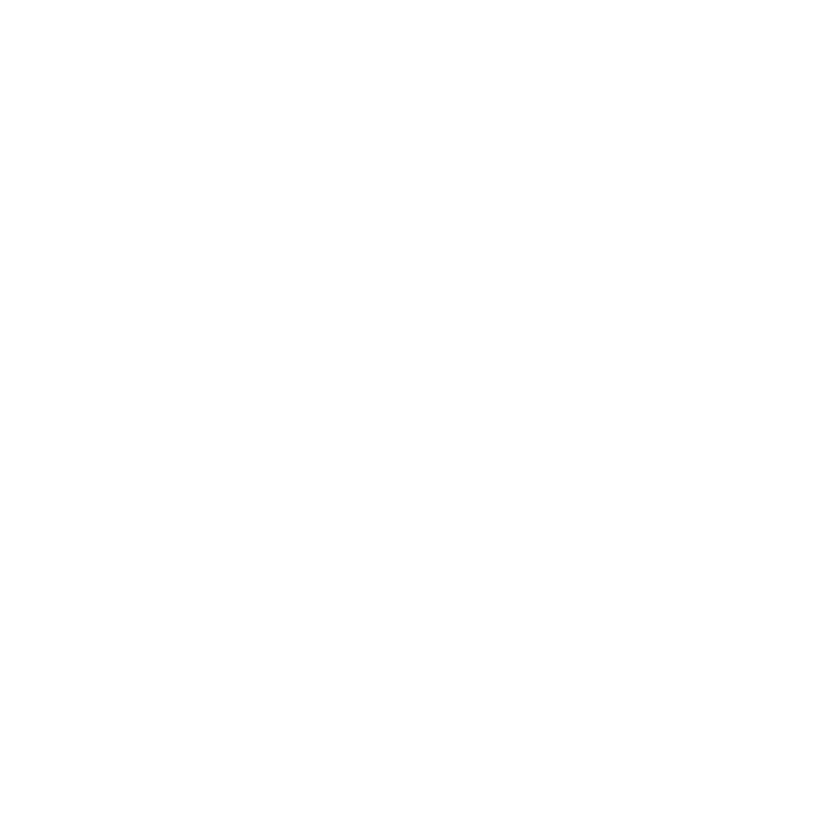

In [38]:
ggplot(df, aes(Data, Receita_Liq_Total)) + geom_line(color='#000033') + ggtitle("Vendas Liquidas Totais Diarias");

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,23

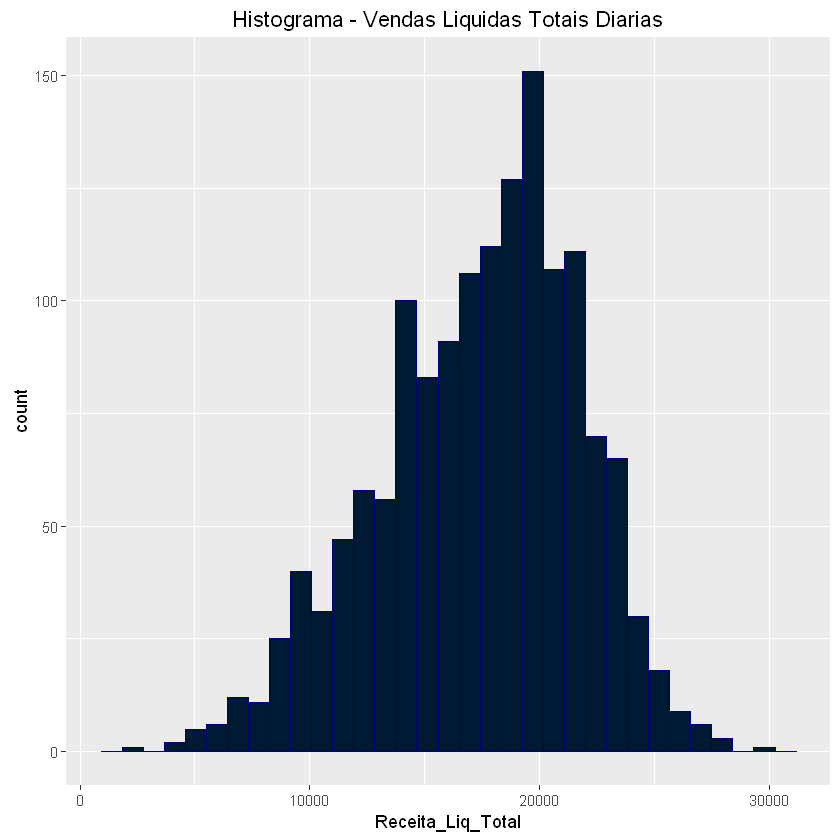

In [39]:
ggplot(df, aes(Receita_Liq_Total))+ geom_histogram (color='navy', fill = '#001a33') + ggtitle("Histograma - Vendas Liquidas Totais Diarias")

### Calculate Autocorrelation Function and Partial Autocorrelation Function of Total Daily Revenue - note seasonal peaks

In [40]:
acf(df$Receita_Liq_Total, na.action = na.pass,lag.max = 52)

ERROR: Error in round(frequency): non-numeric argument to mathematical function


In [41]:
pacf(df$Receita_Liq_Total, na.action = na.pass,lag.max = 52)

ERROR: Error in round(frequency): non-numeric argument to mathematical function


### Time Series Plots of Total Revenue per Store

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,23

ERROR: Error in seq.int(0, to0 - from, by): 'to' cannot be NA, NaN or infinite


ERROR: Error in file(con, "rb"): cannot open the connection


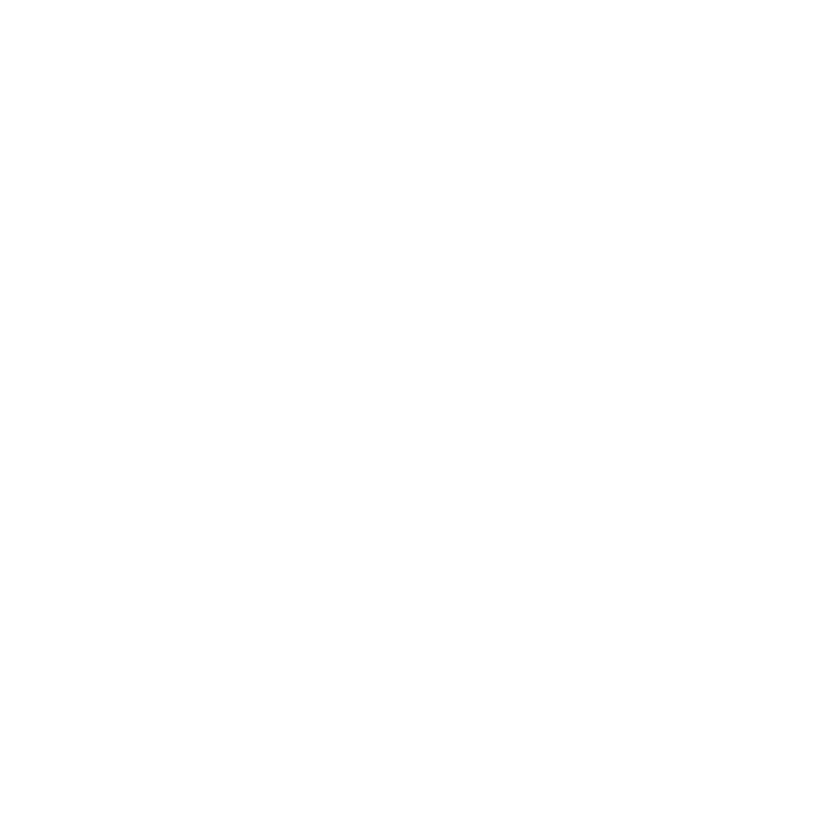

In [42]:
ggplot(df, aes(Data, valor_Loja01)) + geom_line(color='#b80000') + ggtitle("Vendas Liquidas Loja 01");

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,23

ERROR: Error in seq.int(0, to0 - from, by): 'to' cannot be NA, NaN or infinite


ERROR: Error in file(con, "rb"): cannot open the connection


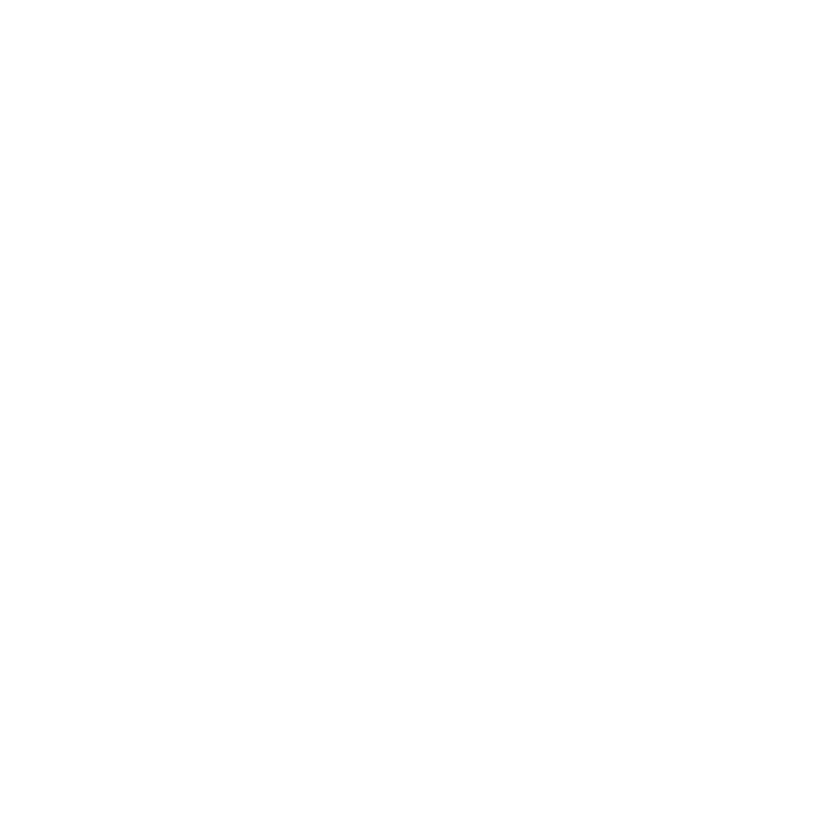

In [43]:
ggplot(df, aes(Data, valor_Loja02)) + geom_line(color='#300052') + ggtitle("Vendas Liquidas Loja 02");

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,23

ERROR: Error in seq.int(0, to0 - from, by): 'to' cannot be NA, NaN or infinite


ERROR: Error in file(con, "rb"): cannot open the connection


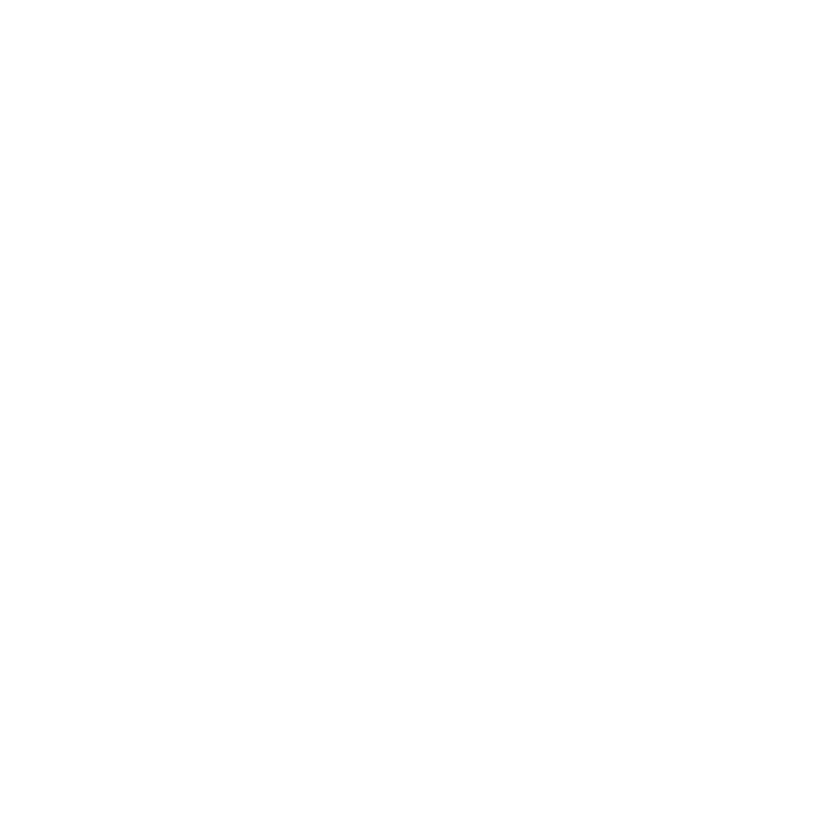

In [44]:
ggplot(df, aes(Data, valor_Loja03)) + geom_line(color='#003b4d') + ggtitle("Vendas Liquidas Loja 03");

### Call Dynamic Linear Regression Package (needs to be previously installed with all dependencies)

In [45]:
library("dynlm")

Warning message:
: package 'dynlm' was built under R version 3.2.3

In [46]:
library("zoo")    # Another time series library

### Read the data frame into zoo format

In [47]:
df_como_st = read.zoo(df, format = "%d-%m-%Y")

ERROR: Error in read.zoo(df, format = "%d-%m-%Y"): index has 1484 bad entries at data rows: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 ...


In [48]:
dfTozoo = function(tsdataframe, dateformat="%d-%m-%y"){

  library(zoo)

  framedates = as.Date(tsdataframe[,1], format=dateformat)
  n=ncol(tsdataframe)
  zoodata = zoo(tsdataframe[,2:n], order.by=framedates)

  return(zoodata)
}

In [49]:
df_como_st = dfTozoo(df)

Warning message:
In zoo(tsdataframe[, 2:n], order.by = framedates): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

In [50]:
str(df_como_st)

'zoo' series from NA to NA
  Data: chr [1:1484, 1:81] "1" "2" "3" "4" "5" "6" "7" "1" "2" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:81] "Dia.da.Semana" "Feriado_Nacional" "Carnaval" "Pascoa" ...
  Index:  Date[1:1484], format: NA NA NA NA NA NA NA NA NA NA NA NA NA NA ...


In [51]:
df_como_st$Receita_Liq_Total[1:10]

Warning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

    <NA>     <NA>     <NA>     <NA>     <NA>     <NA>     <NA>     <NA> 
 2154.84 15496.59 14581.77 15275.80 15765.62 16031.13 14253.16  7163.59 
    <NA>     <NA> 
15809.17 13986.53 

In [52]:
df_como_st$Receita_Liq_Total[1474:1484]

Warning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

    <NA>     <NA>     <NA>     <NA>     <NA>     <NA>     <NA>     <NA> 
18477.97 15137.46 16116.02 16433.12  9673.44 15875.96 13722.74 12506.78 
    <NA>     <NA>     <NA> 
15217.76 15147.36 13981.85 

### Create zoo object from the original data frame using the date column as index

In [53]:
df_zoo = zoo(df,df$Data)

Warning message:
In zoo(df, df$Data): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

In [54]:
str(df_zoo)

'zoo' series from NA to NA
  Data: chr [1:1484, 1:82] "2012-01-01" "2012-01-02" "2012-01-03" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:82] "dataVenda" "Dia.da.Semana" "Feriado_Nacional" "Carnaval" ...
  Index:  Date[1:1484], format: NA NA NA NA NA NA NA NA NA NA NA NA NA NA ...


In [55]:
rlt_serie = as.numeric(df$Receita_Liq_Total)
rlt.Date <- df$Data
rlt <- zoo(rlt_serie, rlt.Date)

Warning message:
In zoo(rlt_serie, rlt.Date): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

In [56]:
str(rlt)

'zoo' series from NA to NA
  Data: num [1:1484] 2155 15497 14582 15276 15766 ...
  Index:  Date[1:1484], format: NA NA NA NA NA NA NA NA NA NA NA NA NA NA ...


In [57]:
model <- dynlm(df_zoo$Receita_Liq_Total ~ L(df_zoo$Receita_Liq_Total, k = 1) + L(df_zoo$Receita_Liq_Total, k = 7))
               
               
model

#df_zoo
#++ df_zoo$Carnaval+ L(rlt, k = 14) + L(rlt, k = 21) + L(rlt, k = 28)) +  + Pascoa + Natal + Reveillon

Warning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

ERROR: Error in merge.zoo(df_zoo$Receita_Liq_Total, L(df_zoo$Receita_Liq_Total, : series cannot be merged with non-unique index entries in a series


ERROR: Error in eval(expr, envir, enclos): object 'model' not found


In [58]:
# Fit dynamic linear model - DOES NOT FIT DUMMY VARIABLES! SEE RESULTS BELOW!
model <- dynlm(rlt ~ L(rlt, k = 1) + L(rlt, k = 7) + L(rlt, k = 14) + L(rlt, k = 21) + L(rlt, k = 28)) + Carnaval + Pascoa + Natal + Reveillon
model

Warning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval[i], index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique

ERROR: Error in merge.zoo(rlt, L(rlt, k = 1), L(rlt, k = 7), L(rlt, k = 14), : series cannot be merged with non-unique index entries in a series


ERROR: Error in eval(expr, envir, enclos): object 'model' not found


In [59]:
library(data.table)
library(forecast)
library(plyr)

Warning message:
: package 'data.table' was built under R version 3.2.3
Attaching package: 'data.table'

The following object is masked from 'package:xts':

    last

Warning message:
: package 'forecast' was built under R version 3.2.3Loading required package: timeDate
Warning message:
: package 'timeDate' was built under R version 3.2.3This is forecast 6.2 

Warning message:
: package 'plyr' was built under R version 3.2.3

In [60]:
# Using the Forecast package - summary of the time series characteristics

# tsdisplay(x, plot.type=c("partial","scatter","spectrum"),
#    points=TRUE, ci.type=c("white", "ma"),
#    lag.max, na.action=na.contiguous,main=NULL, xlab="", ylab="", pch=1, cex=0.5, ...)


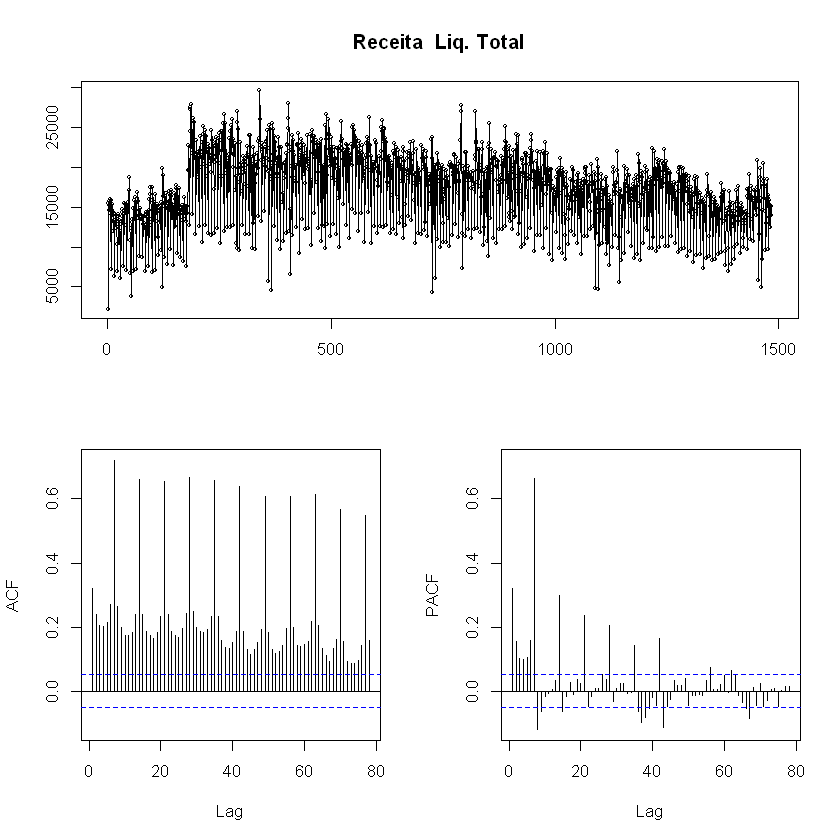

In [61]:
tsdisplay(df$Receita_Liq_Total, lag.max = 78, main = "Receita  Liq. Total")

In [62]:
# This script fits a linear model to a time series including trend and seasonality components
# We use tslm() and forecast() in the "forecast" R package 


In [63]:
# tslm function - time series wrapper (analogous to lm)
# USAGE: tslm(formula, data, lambda=NULL, ...)
#
# For example:
#
# fit <- tslm(Sales ~ trend + season + DayOfWeek + Open + Promo + StateHoliday + SchoolHoliday)


In [64]:
ts_fit = function(x) {
  Sales <- ts(x$Sales, frequency = 365)
  DayOfWeek <- x$DayOfWeek
  Open <- x$Open
  Promo <- x$Promo
  StateHoliday <- x$StateHoliday
  SchoolHoliday <- x$SchoolHoliday
  fit <- tslm(Sales ~ trend + season + DayOfWeek + Open + Promo + StateHoliday + SchoolHoliday)
  return(fit)
}

In [65]:
y = ts(df$Receita_Liq_Total, frequency = 7)

In [66]:
yhat = tslm(y ~ trend + season + df$Dia.da.Semana + df$Carnaval + df$Pascoa)

In [67]:
plot(forecast(yhat, h=20))

ERROR: Error in plot(forecast(yhat, h = 20)): error in evaluating the argument 'x' in selecting a method for function 'plot': Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels) : 
  variable lengths differ (found for 'df$Dia.da.Semana')
Calls: forecast ... predict -> predict.lm -> model.frame -> model.frame.default



In [68]:
ytrain <- window(df$Receita_Liq_Total,end="2015-06-30")

In [69]:
str(ytrain)

An 'xts' object of zero-width


In [70]:
ytrain = ts(ytrain, frequency = 7)

ERROR: Error in ts(ytrain, frequency = 7): 'ts' object must have one or more observations


In [71]:
str(ytrain)

An 'xts' object of zero-width


In [72]:
Dia.da.Semana_train = window(df$Dia.da.Semana,end="2015-06-30")

Warning message:
In window.default(df$Dia.da.Semana, end = "2015-06-30"): 'end' value not changed

In [73]:
Carnaval_train <- window(df$Carnaval,end="2015-06-30")

Warning message:
In window.default(df$Carnaval, end = "2015-06-30"): 'end' value not changed

In [74]:
Pascoa_train <- window(df$Pascoa,end="2015-06-30")

Warning message:
In window.default(df$Pascoa, end = "2015-06-30"): 'end' value not changed

In [75]:
Natal_train= window(df$Natal, end = '2015-06-30')

Warning message:
In window.default(df$Natal, end = "2015-06-30"): 'end' value not changed

In [76]:
str(Dia.da.Semana_train)

 atomic [1:1484] 1 2 3 4 5 6 7 1 2 3 ...
 - attr(*, "tsp")= num [1:3] 1 1484 1


In [77]:
fit <- tslm(ytrain ~ trend + season + df$Dia.da.Semana + df$Carnaval + df$Pascoa)

ERROR: Error in tslm(ytrain ~ trend + season + df$Dia.da.Semana + df$Carnaval + : Not time series data


In [78]:
refit <- Arima(hsales, model=fit)
fc <- window(fitted(refit), start=1990)

ERROR: Error in Arima(hsales, model = fit): object 'hsales' not found


ERROR: Error in fitted(refit): object 'refit' not found
